딥러닝을 위한 텍스트 전처리
- 용도에 맞게 텍스트를 사전에 처리하는 작업
- 토큰화(Tokenization)
- 정제(Cleaning) and 정규화(Normalization)
 * 정제(cleaning) : 갖고 있는 코퍼스로부터 노이즈 데이터를 제거
 * 정규화(normalization) : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만듬
- 표제어 추출(lemmatization)과 어간 추출(stemming) => 형태소
 * 어간(stem): 단어의 의미를 담고 있는 단어의 핵심 부분
 * 접사(affix): 단어에 추가적인 의미를 주는 부분
- 불용어(Stopword)
- 정규 표현식(Regular Expression)
- 정수 인코딩(Integer Encoding): 텍스트를 숫자로 바꾸는 여러가지 기법(각 단어를 고유한 정수에 맵핑(mapping))
- 패딩(Padding): 병렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업
- 원-핫 인코딩(One-Hot Encoding): 자연어 처리에서는 문자를 숫자로 바꾸는 여러가지 기법
- 데이터의 분리(Splitting Data): 머신 러닝(딥 러닝) 모델에 데이터를 훈련시키기 위해서 데이터를 적절히 분리하는 작업

### 영어 문장
표준 토큰화(Tokenization)
- 규칙 1. 하이푼으로 구성된 단어는 하나로 유지한다.
- 규칙 2. doesn't와 같이 아포스트로피로 '접어'가 함께하는 단어는 분리해준다.

In [1]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer=TreebankWordTokenizer()
text="Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print(tokenizer.tokenize(text))

['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


문장 토큰화(영어)

In [2]:
from nltk.tokenize import sent_tokenize  # 영어 문장
text="His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print(sent_tokenize(text))

['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [3]:
from nltk.tokenize import sent_tokenize
text="I am actively looking for Ph.D. students. and you are a Ph.D student."
print(sent_tokenize(text))

['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


### 한글 문장
한글 토큰화
- Konlpy 모듈: Okt, Kkma, Hannannum, KOMORAN, mecab  # https://iostream.tistory.com/144 성능비교
- ckonlpy.Twitter(사전추가)
- morphs : 형태소 추출 / pos : 품사 태깅(Part-of-speech tagging) / nouns : 명사 추출

In [12]:
from konlpy.tag import Kkma
text='딥러닝자연어처리가재미있기는합니다.그런데문제는영어보다한국어로할때너무어려워요.농담아니에요.이제해보면 알걸요?'
okt=Kkma()
print(okt.morphs(text))
print(okt.pos(text))
print(okt.nouns(text))

['딥', '러닝', '자연어', '처리', '가', '재미있', '기', '는', '하', 'ㅂ니다', '.', '그러', 'ㄴ', '데', '문제', '는', '영어', '보다', '한국', '어로', '하', 'ㄹ', '때', '너무', '어렵', '어요', '.', '농담', '아니', '에요', '.', '이제', '해보', '면', '알', 'ㄹ걸요', '?']
[('딥', 'NNG'), ('러닝', 'NNG'), ('자연어', 'NNG'), ('처리', 'NNG'), ('가', 'JKS'), ('재미있', 'VA'), ('기', 'ETN'), ('는', 'JX'), ('하', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF'), ('그러', 'VV'), ('ㄴ', 'ETD'), ('데', 'NNB'), ('문제', 'NNG'), ('는', 'JX'), ('영어', 'NNG'), ('보다', 'JKM'), ('한국', 'NNG'), ('어로', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETD'), ('때', 'NNG'), ('너무', 'MAG'), ('어렵', 'VA'), ('어요', 'EFN'), ('.', 'SF'), ('농담', 'NNG'), ('아니', 'VCN'), ('에요', 'EFN'), ('.', 'SF'), ('이제', 'MAG'), ('해보', 'VV'), ('면', 'ECE'), ('알', 'VV'), ('ㄹ걸요', 'EFN'), ('?', 'SF')]
['딥', '딥러닝자연어처리', '러닝', '자연어', '처리', '문제', '영어', '한국', '한국어로', '어로', '데', '때', '농담']


In [14]:
# !pip install kss

In [15]:
# KSS(Korean Sentence Splitter): 한글 문장 토큰화 도구
import kss
text='딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어려워요. 농담아니에요. 이제 해보면 알걸요?'
print(kss.split_sentences(text))

['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어려워요.', '농담아니에요.', '이제 해보면 알걸요?']


한국어 어간 추출
- 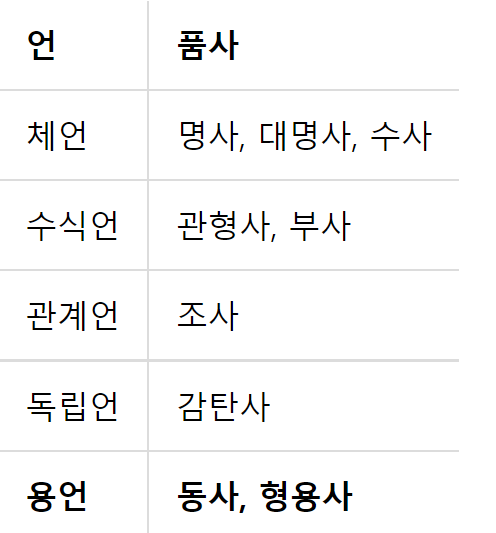

불용어(Stopword)
- 유의미한 단어 토큰만을 선별하기 위해서 큰 의미가 없는 단어 토큰을 제거하는 작업

In [17]:
from nltk.corpus import stopwords  
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [18]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(example)

result = [w for w in word_tokens if w not in stop_words]

print(word_tokens) 
print(result) 

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


In [19]:
# 한국어 불용어 리스트: https://bab2min.tistory.com/544
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든"
# 위의 불용어는 명사가 아닌 단어 중에서 저자가 임의로 선정한 것으로 실제 의미있는 선정 기준이 아님
stop_words=stop_words.split(' ')
word_tokens = word_tokenize(example)

result = [w for w in word_tokens if w not in stop_words]

print(word_tokens) 
print(result)

['고기를', '아무렇게나', '구우려고', '하면', '안', '돼', '.', '고기라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']
['고기를', '구우려고', '안', '돼', '.', '고기라고', '다', '같은', '게', '.', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']


정규 표현식(Regular Expression)
- re 모듈
- [문자] : 대괄호 안의 문자들 중 한 개의 문자와 매치, 예 => [a-zA-Z가-힣0-9] / [가나다]
- [^문자]: 해당 문자를 제외한 문자를 매치, 예 => [^a-zA-Z가-힣0-9]
- 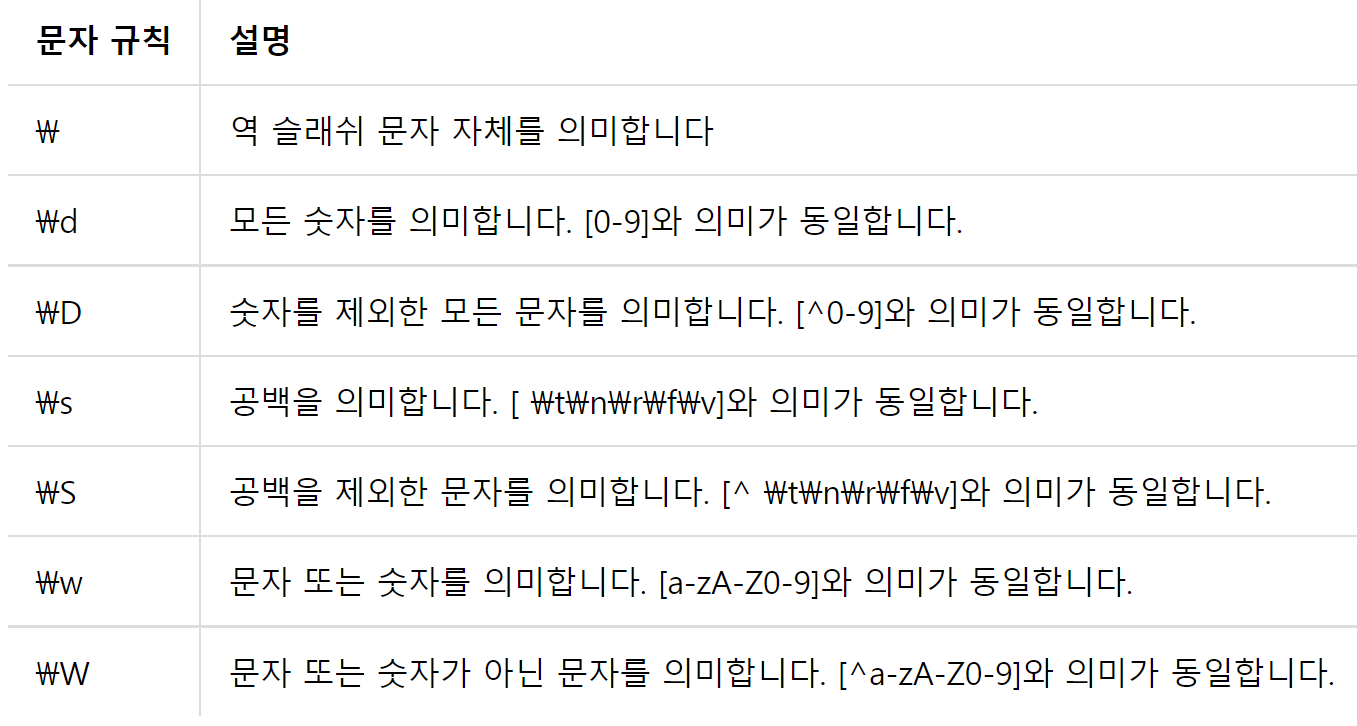

re 모듈엣 지원하는 함수
- re.sub(정규식, 대체문자, 대상): 문자열에서 정규 표현식과 일치하는 부분에 대해서 다른 문자열로 대체
- re.split(정규식, 대상): 입력된 정규 표현식을 기준으로 문자열들을 분리하여 리스트로 리턴
- re.findall(정규식, 대상): 정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴

In [20]:
import re
text="사과 딸기 수박 메론 바나나"
re.split(" ",text) # text.split(" ")

['사과', '딸기', '수박', '메론', '바나나']

In [21]:
text="""사과
딸기
수박
메론
바나나"""
re.split("\n",text)

['사과', '딸기', '수박', '메론', '바나나']

In [25]:
text="""이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남""" 

print(re.findall("\d",text))
print(re.findall("\d+",text))
print(re.findall("\w+",text))
print(re.findall("\d+","안녕하세요."))

['0', '1', '0', '1', '2', '3', '4', '1', '2', '3', '4', '3', '0']
['010', '1234', '1234', '30']
['이름', '김철수', '전화번호', '010', '1234', '1234', '나이', '30', '성별', '남']
[]


In [31]:
text='''
정규 표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체. 
Regular expression : A regular expression, regex or regexp[1] 
(sometimes called a rational expression)[2][3] is, 
in theoretical computer science and formal language theory, 
a sequence of characters that define a search pattern. 
'''
print(re.sub('[^가-힣a-zA-Z0-9 ]', "", text))
print()
print(re.sub('[가-힣a-zA-Z0-9 \n\t]', "", text))

정규 표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체 Regular expression  A regular expression regex or regexp1 sometimes called a rational expression23 is in theoretical computer science and formal language theory a sequence of characters that define a search pattern 

.:,[]()[][],,.


In [32]:
re.findall('[A-Z]', text)

['R', 'A']

In [35]:
print(re.findall('[가-힣]', text))
print(re.findall('[가-힣]+', text))
print(re.findall('[가-힣]{4}', text))

['정', '규', '표', '현', '식', '패', '턴', '과', '일', '치', '하', '는', '문', '자', '열', '을', '찾', '아', '다', '른', '문', '자', '열', '로', '대', '체']
['정규', '표현식', '패턴과', '일치하는', '문자열을', '찾아', '다른', '문자열로', '대체']
['일치하는', '문자열을', '문자열로']


정수 인코딩(Integer Encoding)

In [36]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [37]:
text = '''
A barber is a person.a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain.
'''

In [38]:
# 문장 토큰화
text = sent_tokenize(text)
print(text)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


In [42]:
# 정제 작업 및 단어 토큰화
vocab = {} # 파이썬의 dictionary 자료형
sentences = []
stop_words = set(stopwords.words('english'))

for i in text:
    sentence = word_tokenize(i) # 단어 토큰화를 수행합니다.
    result = []

    for word in sentence: 
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄입니다.
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거합니다.
            if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거합니다.
                result.append(word)
                if word not in vocab:
                    vocab[word] = 0   # 단어가 vocab에 없으면 추가 단어(Keys) 추가
                vocab[word] += 1
                
    sentences.append(result)
    
print(sentences,"\n")  # 3글자 이상의 단어
print(vocab)      # 단어의 빈도수

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']] 

{'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [41]:
print(type(vocab))

<class 'dict'>


람다(lambda)식
- lambda 인자 : 표현식
- def aa(x, y): return x + y
- (lambda x, y: x + y)(10, 20)

In [43]:
vocab.items()

dict_items([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])

In [44]:
# 빈도수가 높은 순서대로 정렬
# sorted(정렬할 데이터, key 파라미터, reverse 파라미터)

vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


In [45]:
# 높은 빈도수를 가진 단어일수록 낮은 정수 인덱스를 부여
word_to_index = {}

i=0
for (word, frequency) in vocab_sorted :
    if frequency > 1 : # 정제(Cleaning) 챕터에서 언급했듯이 빈도수가 적은 단어는 제외한다.
        i=i+1
        word_to_index[word] = i
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


In [52]:
vocab_size = 5
words_frequency = [w for w,c in word_to_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
for w in words_frequency:
    del word_to_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


- index=> {'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}
- 원본=> ['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person']
- index 매핑=> [1, 5], [1, ??, 5], [1, ??, 5]
- ?? => Out-Of-Vocabulary(단어 집합에 없는 단어)=> OOV:6

In [53]:
len(word_to_index)

5

In [54]:
word_to_index['OOV'] = len(word_to_index) + 1   # Out-Of-Vocabulary으로 마지막 번호 부여
word_to_index['OOV']

6

In [55]:
encoded = []

for s in sentences:
    temp = []
    for w in s:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index['OOV'])
    encoded.append(temp)
print(encoded)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


collections.Counter 이용하기

In [56]:
from collections import Counter
print(sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [58]:
words = sum(sentences, [])
print(words)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


In [59]:
vocab = Counter(words)
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


In [60]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [61]:
# 정수 인덱스 부여
word_to_index = {}
i = 0
for (word, frequency) in vocab :
    i = i+1
    word_to_index[word] = i
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [62]:
word_to_index['OOV'] = len(word_to_index) + 1   # Out-Of-Vocabulary으로 마지막 번호 부여

encoded = []

for s in sentences:
    temp = []
    for w in s:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index['OOV'])
    encoded.append(temp)
print(encoded)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


원-핫 인코딩(One-Hot Encoding)
- 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식
- (1) 각 단어에 고유한 인덱스를 부여합니다. (정수 인코딩)
- (2) 표현하고 싶은 단어의 인덱스의 위치에 1을 부여하고, 다른 단어의 인덱스의 위치에는 0을 부여합니다.

In [63]:
from konlpy.tag import Okt  
okt=Okt()  
token=okt.morphs("나는 자연어 처리를 배운다")  
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


In [64]:
word2index={}
for voca in token:
     if voca not in word2index.keys():
            word2index[voca]=len(word2index)
print(word2index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [65]:
def one_hot_encoding(word, word2index):
    one_hot_vector = [0]*(len(word2index))
    index=word2index[word]
    one_hot_vector[index]=1
    return one_hot_vector

In [66]:
one_hot_encoding("자연어",word2index)

[0, 0, 1, 0, 0, 0]

케라스(Keras)를 이용한 원-핫 인코딩(One-Hot Encoding)
- to_categorical()를 지원
- 정수 인코딩과 원-핫 인코딩을 순차적으로 진행

In [69]:
#!pip install tensorflow   (CPU 기준 설치)
# 윈도우 Tensorflow-GPU(2.2.0) 설치하기 : https://chancoding.tistory.com/89

In [71]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [72]:
text="나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

t = Tokenizer()
t.fit_on_texts([text])
print(t.word_index) # 각 단어에 대한 인코딩 결과 출력.

{'갈래': 1, '점심': 2, '햄버거': 3, '나랑': 4, '먹으러': 5, '메뉴는': 6, '최고야': 7}


In [73]:
sub_text="점심 먹으러 갈래 메뉴는 햄버거 최고야"
encoded=t.texts_to_sequences([sub_text])[0]
print(encoded)

[2, 5, 1, 6, 3, 7]


In [74]:
one_hot = to_categorical(encoded)
print(one_hot)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
